In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../../pivotech project/train.csv')
df_test = pd.read_csv('../../pivotech project/test.csv')
df.shape

(42000, 785)

In [35]:
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
X = df.drop('label', axis=1)/255
y = df['label']

In [37]:
X.shape

(42000, 784)

In [38]:
def show_digit(X,index):
    img0 = X.iloc[index].values.reshape(28,28)/255
    plt.imshow(img0)

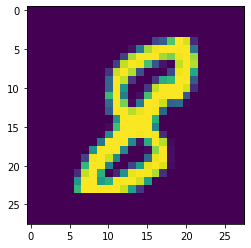

In [39]:
show_digit(X, 512)

In [40]:
df_test.shape

(28000, 784)

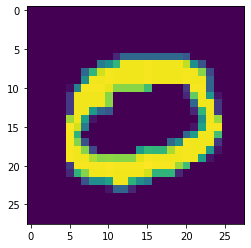

In [41]:
show_digit(df_test, 1)

In [42]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [43]:
from tensorflow.keras.utils import to_categorical

In [44]:
y_train = to_categorical(y, num_classes=10)

In [45]:
y_train.shape

(42000, 10)

# Model Bulding

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [47]:
model = Sequential()
model.add(Dense(16, activation='relu',input_shape=(784,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax')) # Probability

model.compile(loss='categorical_crossentropy')

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                12560     
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.fit(X, y_train, epochs=10, batch_size=64)

Epoch 1/10
657/657 [==============================] - 1s 1ms/step - loss: 0.6140
Epoch 2/10
657/657 [==============================] - 1s 1ms/step - loss: 0.2745
Epoch 3/10
657/657 [==============================] - 1s 1ms/step - loss: 0.2339
Epoch 4/10
657/657 [==============================] - 1s 1ms/step - loss: 0.2117
Epoch 5/10
657/657 [==============================] - 1s 1ms/step - loss: 0.1958
Epoch 6/10
657/657 [==============================] - 1s 1ms/step - loss: 0.1833
Epoch 7/10
657/657 [==============================] - 1s 1ms/step - loss: 0.1737
Epoch 8/10
657/657 [==============================] - 1s 1ms/step - loss: 0.1662
Epoch 9/10
657/657 [==============================] - 1s 1ms/step - loss: 0.1611
Epoch 10/10
657/657 [==============================] - 1s 1ms/step - loss: 0.1553


In [50]:
q = df_test.iloc[1].values.reshape(1,784)/255
model.predict(q).argmax()

1/1 [==============================] - 0s 53ms/step


0

In [51]:
def predict_from_dftest(index):
    q = df_test.iloc[index].values.reshape(1,784)/255
    print(model.predict(q).argmax())

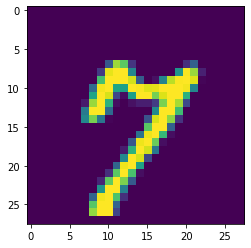

In [52]:
show_digit(df_test,104)

In [53]:
predict_from_dftest(104)

1/1 [==============================] - 0s 18ms/step
7


In [66]:
model.save("digitmodel.h5")

In [67]:
from keras.models import load_model

In [68]:
model=load_model("digitmodel.h5")

In [73]:
result=model.predict(X,512)

83/83 [==============================] - 0s 3ms/step
